# loading the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# loading the datasets

In [2]:
#loading the train dataset
df=pd.read_excel('Data_Train.xlsx')
df.head(5)


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [3]:
#loading the test dataset
dft=pd.read_excel('Data_Test.xlsx')
dft.head(5)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


# Features of the data

RESTAURANT_ID: A unique ID for each restaurant.

CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.

RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

COST: The average cost of a two-person meal.

# preprocessing

In [4]:
#checking the shape of train and test data

print('df:',df.shape)
print('\n')
print('dft:',dft.shape)

df: (12690, 9)


dft: (4231, 8)


# train data

In [5]:
#checking the types of data
df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [6]:
#cheking the columns about the data
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [7]:
#checking the info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [8]:
#checking the null values in the data
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

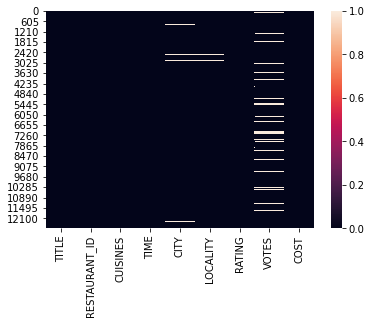

In [9]:
#using heatmap for better representation of the null values
sns.heatmap(df.isnull())

In [10]:
#dropping the columns
df.drop(columns=['RESTAURANT_ID'],axis=1, inplace=True)

In [11]:
#filling the null values 
df.fillna(method='ffill', inplace=True)

In [12]:
df.isnull().sum()

TITLE       0
CUISINES    0
TIME        0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
COST        0
dtype: int64

In [13]:
#describing the dataset
df.describe()

,COST
count,12690.000000
mean,655.252246
std,627.003540
min,20.000000
25%,300.000000
50%,500.000000
75%,800.000000
max,14000.000000


In [14]:
#trasnforming the non numerical data into numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['TITLE','CUISINES','TIME','CITY','LOCALITY','RATING','VOTES']
for val in list1:
    df[val]=le.fit_transform(df[val])

In [15]:
df.dtypes

TITLE       int32
CUISINES    int32
TIME        int32
CITY        int32
LOCALITY    int32
RATING      int32
VOTES       int32
COST        int64
dtype: object

In [16]:
df.describe()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,59.465721,2235.193932,1180.084003,143.022853,655.468006,18.796612,970.233727,655.252246
std,32.762427,1204.091664,754.459944,84.060389,399.636348,6.182287,502.495369,627.003540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,31.000000,1185.250000,555.000000,67.000000,337.000000,16.000000,569.000000,300.000000
50%,59.000000,2416.500000,1123.000000,131.000000,588.000000,19.000000,1021.000000,500.000000
75%,95.000000,3222.750000,1847.000000,222.000000,1010.000000,22.000000,1381.000000,800.000000
max,112.000000,4154.000000,2688.000000,358.000000,1415.000000,31.000000,1846.000000,14000.000000


In [17]:
#checking the correlations
#checking the correlation between columns
dfcor=df.corr()
dfcor

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
TITLE,1.000000,0.244866,0.053914,-0.011426,0.030874,-0.039856,0.005183,-0.263581
CUISINES,0.244866,1.000000,0.104741,0.024583,0.016005,-0.038273,-0.000036,-0.014078
TIME,0.053914,0.104741,1.000000,-0.009768,-0.005762,-0.035102,0.007554,0.018248
CITY,-0.011426,0.024583,-0.009768,1.000000,0.038665,0.027753,0.002365,0.042248
LOCALITY,0.030874,0.016005,-0.005762,0.038665,1.000000,-0.021672,0.002196,-0.016347
RATING,-0.039856,-0.038273,-0.035102,0.027753,-0.021672,1.000000,0.005581,0.236855
VOTES,0.005183,-0.000036,0.007554,0.002365,0.002196,0.005581,1.000000,0.003484
COST,-0.263581,-0.014078,0.018248,0.042248,-0.016347,0.236855,0.003484,1.000000


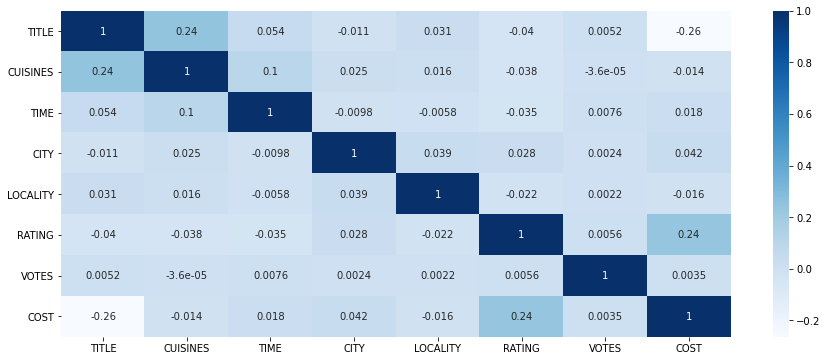

In [18]:
#plotting the heatmap for better underatanding of correlations
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

# visualizations:
    

In [19]:
df.columns

Index(['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES',
       'COST'],
      dtype='object')

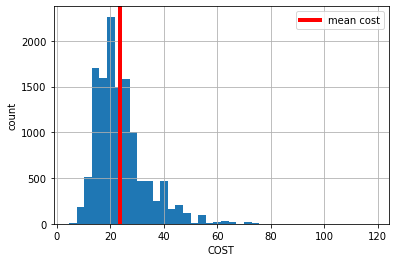

17.320508     1595
20.000000     1357
22.360680     1300
14.142136     1031
24.494897      806
              ... 
118.321596       1
64.031242        1
8.366600         1
72.111026        1
44.158804        1
Name: COST, Length: 86, dtype: int64


In [81]:
#checking the mean cost

COST=df['COST'].hist(bins=40)
mean_val =np.mean(df['COST'])
plt.axvline(mean_val, linewidth=4,color='red', label='mean cost')
plt.xlabel('COST')
plt.ylabel('count')
plt.legend()
plt.show()

print(df['COST'].value_counts())


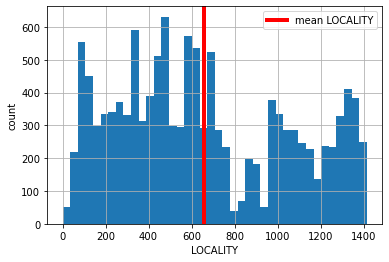

342    166
430    138
484    124
309    123
397    122
      ... 
396      1
388      1
380      1
332      1
0        1
Name: LOCALITY, Length: 1416, dtype: int64


In [78]:
#checking the mean locality


COST=df['LOCALITY'].hist(bins=40)
mean_val =np.mean(df['LOCALITY'])
plt.axvline(mean_val, linewidth=4,color='red', label='mean LOCALITY')
plt.xlabel('LOCALITY')
plt.ylabel('count')
plt.legend()
plt.show()

print(df['LOCALITY'].value_counts())

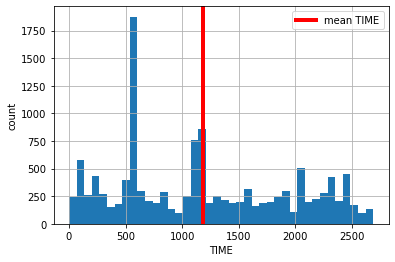

555     1415
1156     469
1123     407
596      310
99       221
        ... 
5          1
2060       1
2068       1
21         1
0          1
Name: TIME, Length: 2689, dtype: int64


In [79]:
#checking the mean time


COST=df['TIME'].hist(bins=40)
mean_val =np.mean(df['TIME'])
plt.axvline(mean_val, linewidth=4,color='red', label='mean TIME')
plt.xlabel('TIME')
plt.ylabel('count')
plt.legend()
plt.show()

print(df['TIME'].value_counts())

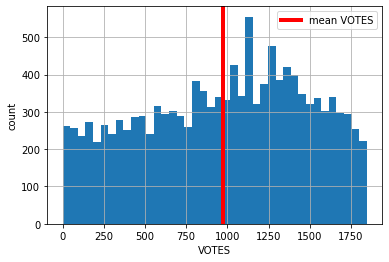

897     78
1202    76
706     72
1059    72
1110    71
        ..
348      1
340      1
332      1
324      1
1843     1
Name: VOTES, Length: 1847, dtype: int64


In [80]:
#checking the mean time


COST=df['VOTES'].hist(bins=40)
mean_val =np.mean(df['VOTES'])
plt.axvline(mean_val, linewidth=4,color='red', label='mean VOTES')
plt.xlabel('VOTES')
plt.ylabel('count')
plt.legend()
plt.show()

print(df['VOTES'].value_counts())

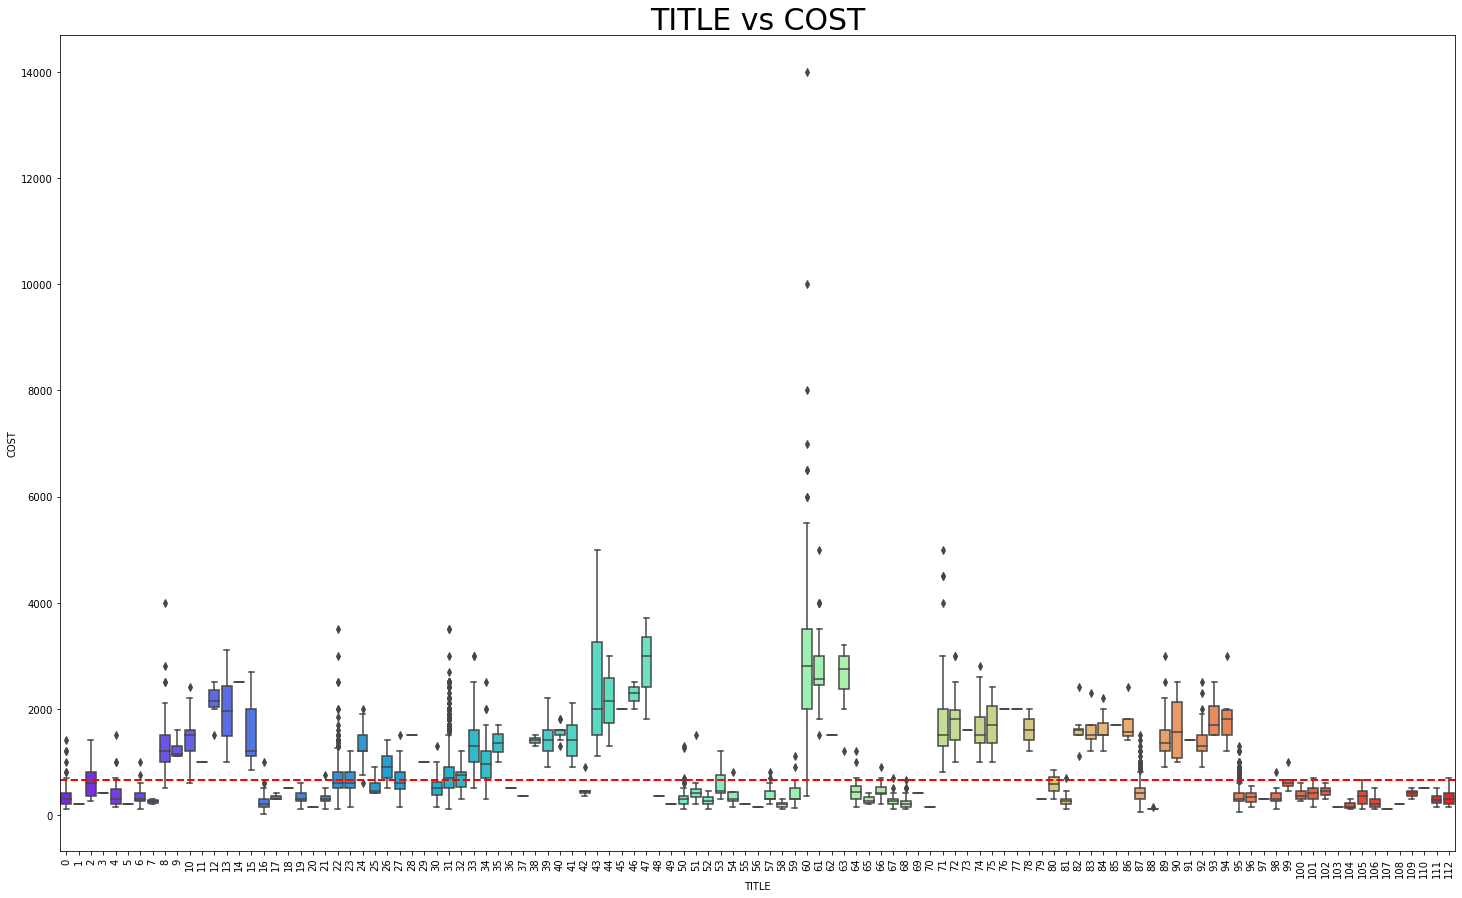

In [26]:
#bivariate analyis
plt.figure(figsize=(25,15))
mean_COST=np.mean(df['COST'])
sns.boxplot(y='COST',x='TITLE',data=df,palette='rainbow')
plt.axhline(mean_COST,color='r',linestyle='dashed',linewidth=2)
plt.title('TITLE vs COST', fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

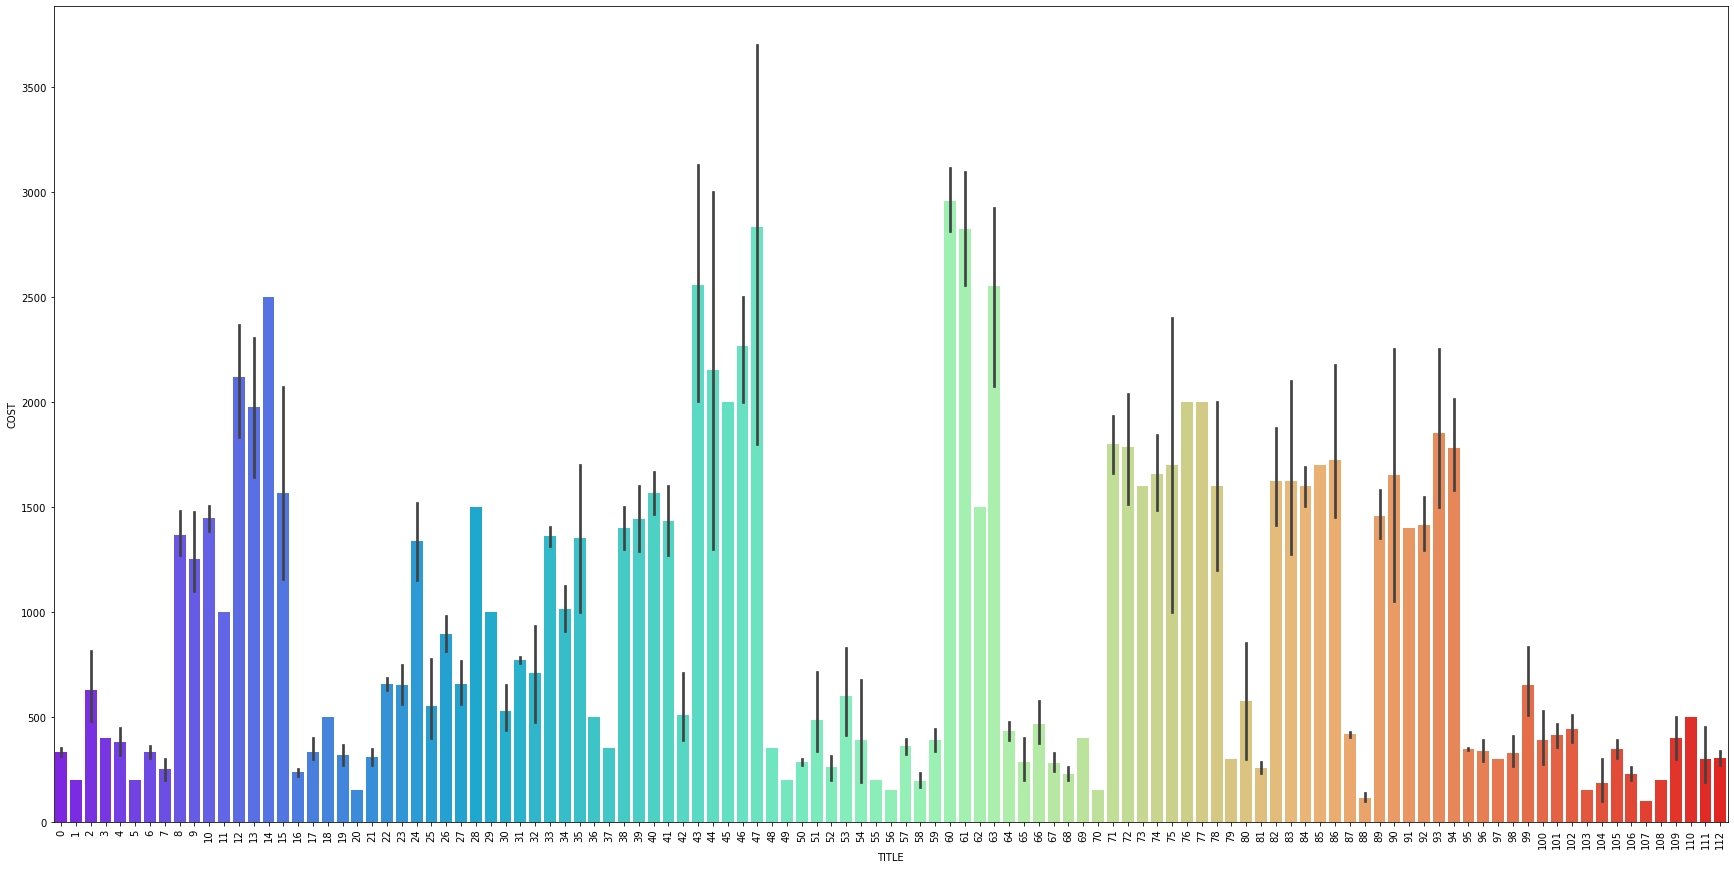

95    4218
31    3652
87    1003
22     607
50     382
      ... 
18       1
14       1
37       1
49       1
85       1
Name: TITLE, Length: 113, dtype: int64


In [28]:
plt.figure(figsize=(30,15))
sns.barplot(x='TITLE',y='COST',data=df,palette='rainbow')
plt.xticks(rotation='vertical')
plt.show()

print(df['TITLE'].value_counts())

In [29]:
df.columns

Index(['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES',
       'COST'],
      dtype='object')

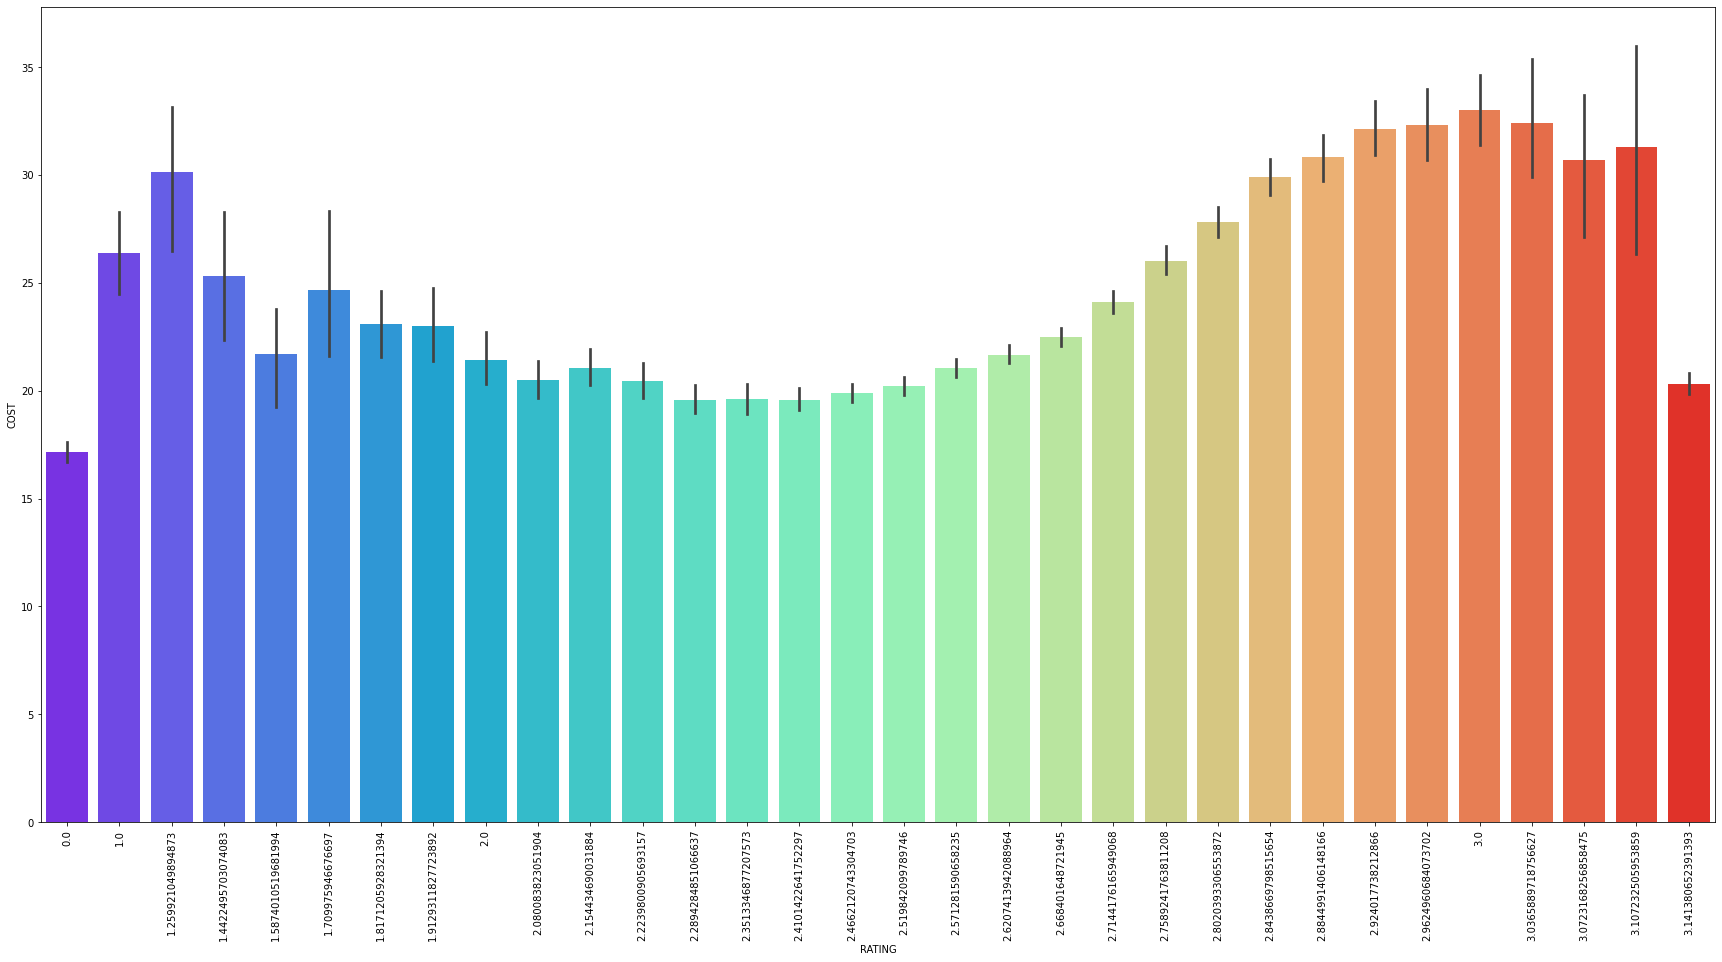

2.714418    1238
2.668402    1190
2.758924    1099
2.620741    1087
2.571282     951
2.802039     936
2.519842     771
2.843867     723
3.141381     708
2.466212     575
2.884499     556
0.000000     495
2.410142     365
2.924018     362
2.351335     266
2.962496     199
2.154435     186
2.289428     186
2.223980     170
2.080084     146
3.000000     141
2.000000      89
3.036589      69
1.912931      61
1.817121      35
3.072317      32
3.107233      22
1.709976      15
1.587401      10
1.259921       3
1.000000       2
1.442250       2
Name: RATING, dtype: int64


In [76]:
plt.figure(figsize=(30,15))
sns.barplot(x='RATING',y='COST',data=df,palette='rainbow')
plt.xticks(rotation='vertical')
plt.show()

print(df['RATING'].value_counts())

In [31]:
df.columns

Index(['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES',
       'COST'],
      dtype='object')

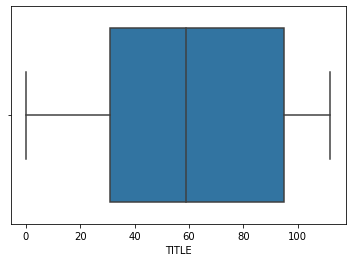

In [32]:
#checking for outliers using boxplot
sns.boxplot(df['TITLE'])

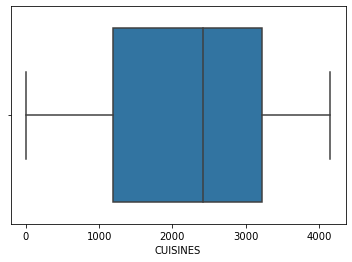

In [33]:
#checking for outliers using boxplot
sns.boxplot(df['CUISINES'])

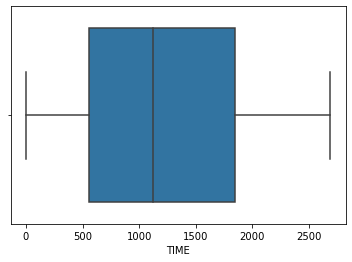

In [34]:
#checking for outliers using boxplot
sns.boxplot(df['TIME'])

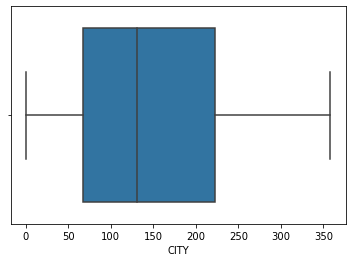

In [35]:
#checking for outliers using boxplot
sns.boxplot(df['CITY'])

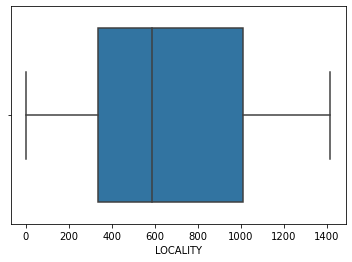

In [36]:
#checking for outliers using boxplot
sns.boxplot(df['LOCALITY'])

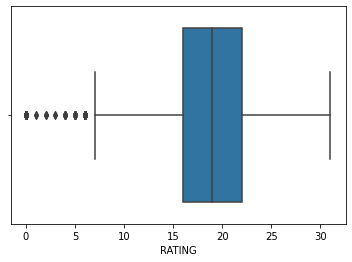

In [37]:
#checking for outliers using boxplot
sns.boxplot(df['RATING'])

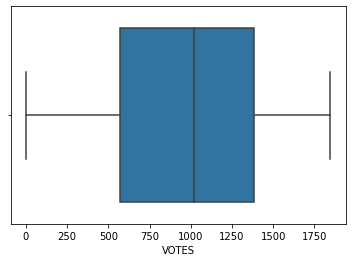

In [38]:
#checking for outliers using boxplot
sns.boxplot(df['VOTES'])

In [39]:
#checking for skewness
df.skew()

TITLE      -0.069803
CUISINES   -0.218782
TIME        0.306186
CITY        0.249769
LOCALITY    0.336859
RATING     -0.802765
VOTES      -0.184958
COST        3.978801
dtype: float64

TITLE
-0.06979452483055656


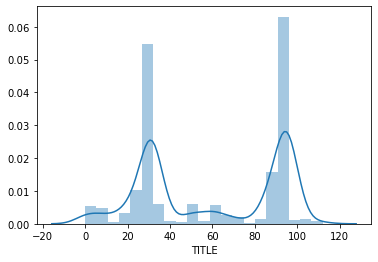

CUISINES
-0.21875595694422817


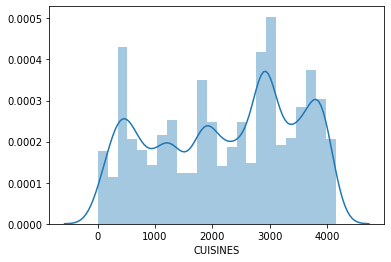

TIME
0.30614971456247203


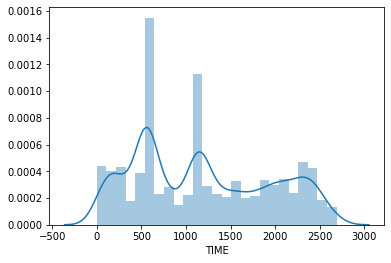

CITY
0.24973947048512835


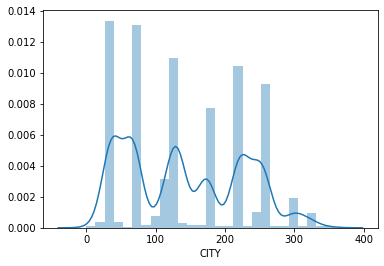

LOCALITY
0.336819306275732


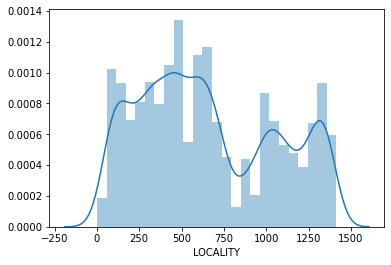

RATING
-0.8026699467581224


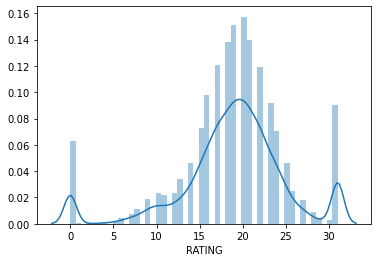

VOTES
-0.1849363833986237


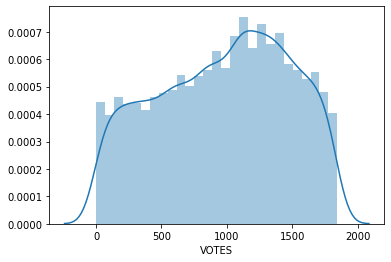

COST
3.97833043496353


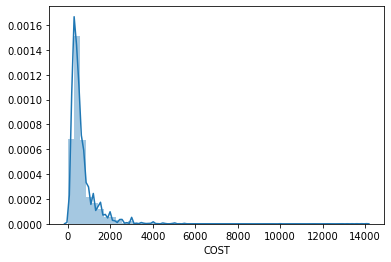

In [40]:
from scipy.stats import skew
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [41]:
#treating skewness via Square root method and cube root method
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.65:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<-0.65:
            df[col]=np.cbrt(df[col])

# treating outliers

In [42]:
#using z-score method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df_new=df[(z<3).all(axis=1)]

In [43]:
threshold=3
print(np.where(z>3))

(array([   13,    84,    85,   156,   178,   208,   235,   253,   308,
         329,   337,   369,   374,   379,   392,   396,   422,   428,
         438,   452,   453,   455,   469,   473,   480,   502,   508,
         563,   577,   604,   615,   625,   644,   690,   731,   749,
         751,   772,   787,   831,   838,   839,   874,   911,   919,
         949,   966,   967,   973,   981,   993,   994,  1009,  1054,
        1126,  1133,  1193,  1196,  1205,  1227,  1287,  1297,  1345,
        1365,  1366,  1395,  1468,  1470,  1472,  1475,  1502,  1543,
        1555,  1581,  1594,  1596,  1597,  1632,  1635,  1657,  1696,
        1701,  1711,  1748,  1759,  1764,  1792,  1806,  1828,  1839,
        1855,  1878,  1884,  1884,  1903,  1916,  1930,  1931,  1983,
        2025,  2039,  2053,  2082,  2092,  2096,  2100,  2109,  2111,
        2115,  2124,  2207,  2251,  2254,  2313,  2327,  2333,  2339,
        2349,  2369,  2407,  2434,  2439,  2459,  2479,  2488,  2495,
        2500,  2531

# Test data

In [44]:
#checking the types of data
dft.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

In [45]:
#cheking the columns about the data
dft.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [46]:
#checking the info about the data
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [47]:
#checking the null values in the data
dft.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

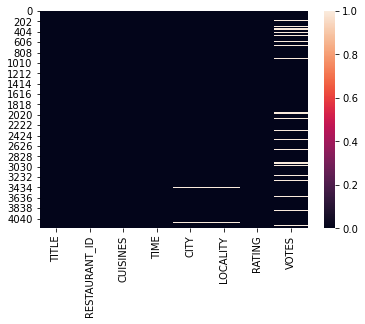

In [48]:
#using heatmap for better representation of the null values
sns.heatmap(dft.isnull())

In [49]:
#dropping the columns
dft.drop(columns=['RESTAURANT_ID'],axis=1, inplace=True)

In [50]:
#filling the null values 
dft.fillna(method='ffill', inplace=True)

In [51]:
#describing the dataset
dft.describe()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
count,4231,4231,4231,4231,4231,4231,4231
unique,86,1727,1183,151,834,31,1136
top,QUICK BITES,"North Indian, Chinese",11am – 11pm (Mon-Sun),Bangalore,Kukatpally,3.8,6 votes
freq,1416,213,447,689,54,414,35


# splitting the data

In [52]:
df.head(10)

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,31,2627,739,320,285,2.571282,1278,34.641016
1,33,289,1885,67,1046,2.843867,950,38.729833
2,31,2976,661,67,1101,2.668402,712,28.284271
3,95,4130,275,222,136,2.802039,787,28.284271
4,50,1766,615,222,620,2.668402,470,17.320508
5,31,3113,1137,222,1360,2.758924,1356,28.284271
6,22,792,1073,37,575,2.802039,1301,24.494897
7,82,416,1528,119,1153,2.884499,451,40.000000
8,95,3924,2020,37,142,2.714418,10,17.320508
9,95,2850,627,131,282,2.410142,702,14.142136


In [53]:
x=df.drop('COST', axis=1)
y=df['COST'] #target variable

In [54]:
x

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,31,2627,739,320,285,2.571282,1278
1,33,289,1885,67,1046,2.843867,950
2,31,2976,661,67,1101,2.668402,712
3,95,4130,275,222,136,2.802039,787
4,50,1766,615,222,620,2.668402,470
...,...,...,...,...,...,...,...
12685,95,2934,1144,131,342,2.668402,1349
12686,33,2143,1177,222,133,2.884499,191
12687,71,2088,1137,239,1342,2.758924,1428
12688,31,3506,1837,67,631,2.519842,996


In [55]:
y

0        34.641016
1        38.729833
2        28.284271
3        28.284271
4        17.320508
           ...    
12685    22.360680
12686    42.426407
12687    36.055513
12688    20.000000
12689    24.494897
Name: COST, Length: 12690, dtype: float64

In [56]:
#checking the shape of independent and target varaible
x.shape

(12690, 7)

In [57]:
y.shape

(12690,)

# Model building

In [58]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled=sc.fit_transform(x)

In [59]:
#importing the model library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#importing boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#importing error  etrics

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [60]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [61]:
#checking the train shape
x_train.shape

(9517, 7)

In [62]:
y_train.shape

(9517,)

In [63]:
#cheking the test shape
x_test.shape

(3173, 7)

In [64]:
y_test.shape

(3173,)

In [65]:
#all algorithms by using for loop

model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),DecisionTreeRegressor(),KNeighborsRegressor()]


for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score;',r2_score(y_test,predm))
    print('***********************************************************')
    print('\n')

Score of LinearRegression() is: 0.17138321613715501
MAE: 5.964941113431124
MSE: 71.54833606157253
RMSE: 8.458624950993661
R2_score; 0.17524302980058493
***********************************************************


Score of Lasso() is: 0.13837498276342897
MAE: 6.016630236598905
MSE: 73.84627065080788
RMSE: 8.593385284671454
R2_score; 0.14875411791445525
***********************************************************


Score of Ridge() is: 0.17138321092421038
MAE: 5.964892978765391
MSE: 71.54813320879539
RMSE: 8.458612960101402
R2_score; 0.17524536813926728
***********************************************************


Score of ElasticNet() is: 0.1416811600436494
MAE: 6.004124138817511
MSE: 73.58769183001554
RMSE: 8.57832686658742
R2_score; 0.15173482573428343
***********************************************************


Score of SVR() is: 0.07527737115317301
MAE: 6.152743221879646
MSE: 79.80628181174778
RMSE: 8.933436170463624
R2_score; 0.08005146152813081
***********************************

In [66]:
#cross validate all algorithms by using for loop

from sklearn.model_selection import cross_val_score
model=[LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),DecisionTreeRegressor(),KNeighborsRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print('score of',m,'is:')
    print('score:',score)
    print('mean score:', score.mean())
    print('Standard deviation',score.std())
    print('********************************************')
    print('\n')

score of LinearRegression() is:
score: [0.16188909 0.16164101 0.18421951 0.16480418 0.18510944]
mean score: 0.17153264430067797
Standard deviation 0.010783327778541687
********************************************


score of Lasso() is:
score: [0.12987389 0.12700534 0.15560452 0.12836591 0.14627731]
mean score: 0.13742539489218422
Standard deviation 0.011458742272109248
********************************************


score of Ridge() is:
score: [0.16188794 0.16164144 0.18422373 0.16480331 0.18510747]
mean score: 0.17153277682553456
Standard deviation 0.010784061378697236
********************************************


score of ElasticNet() is:
score: [0.13387514 0.13249654 0.15999777 0.13372627 0.15216464]
mean score: 0.1424520687629797
Standard deviation 0.011410534202634976
********************************************


score of SVR() is:
score: [0.06876043 0.0845024  0.08451034 0.06048246 0.07655502]
mean score: 0.07496212970243013
Standard deviation 0.009304237324030152
**************

random foreset regressor and and dicision tree regressor is giving the best results

In [69]:
#ridge model is giving best results so finding the best parameters using Gridsearchcv
from sklearn.model_selection import GridSearchCV
RFC=RandomForestRegressor()
parameters={'n_estimators':[100,200,300,400],'max_depth':[4,5,6,7,8,9,10]}
clf=GridSearchCV(RFC,parameters)
clf.fit(x,y)
clf.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [70]:
#using random forest with best parameters

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200,min_samples_split=15,min_samples_leaf=1,max_features='auto',max_depth=10)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print('\n')
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score;',r2_score(y_test,predm))
print('\n')

Score: 0.7950837534406543


MAE: 3.536029401130915
MSE: 22.92920175263913
RMSE: 4.788444606825804
R2_score; 0.07872004209482053




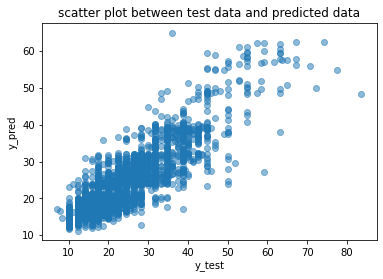

In [74]:
#plotting Scatterplot between test data and predicted data for random forest
plt.scatter(y_test,y_pred, alpha =0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('scatter plot between test data and predicted data')
plt.show()

In [75]:
#saving the Randomforest
import joblib
joblib.dump(rf,'resturant.pkl')

['resturant.pkl']